In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")

---

<div class="alert alert-info">
  <h1><center>Data</center></h1></div>

#### Загрузка

In [2]:
df = pd.read_csv("data/credit_score.csv", low_memory=False)
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [3]:
descriptions = pd.read_csv("data/descriptions.csv")
descriptions.head(2)

,feature,description
0,ID,unique identification of an entry
1,Customer_ID,unique identification of a person


#### Нормализация имён

In [4]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [5]:
descriptions["feature"] = descriptions["feature"].str.lower()
descriptions.head(2)

,feature,description
0,id,unique identification of an entry
1,customer_id,unique identification of a person


---

## Базовая информация о датасете

#### Размер

In [6]:
df.shape

(100000, 28)

#### Типы данных и объём

In [7]:
desc = descriptions.set_index("feature")["description"].to_dict()

for col_name, col_values in df.items():
    print(f"< {col_name} >".center(100, "-"))
    print(f"Data type: {col_values.dtype}")
    print(f"Is unique: {col_values.is_unique}")
    print(f"% of Nones: {col_values.isna().mean()}")
    print(desc.get(col_name, "--"))
    
    display(col_values.value_counts())

-----------------------------------------------< id >-----------------------------------------------
Data type: object
Is unique: True
% of Nones: 0.0
unique identification of an entry


0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: id, Length: 100000, dtype: int64

------------------------------------------< customer_id >-------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
unique identification of a person


CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: customer_id, Length: 12500, dtype: int64

---------------------------------------------< month >----------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
month of the year


January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: month, dtype: int64

----------------------------------------------< name >----------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.09985
name of a person


Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: name, Length: 10139, dtype: int64

----------------------------------------------< age >-----------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
age of the person


38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: age, Length: 1788, dtype: int64

----------------------------------------------< ssn >-----------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
social security number of a person


#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: ssn, Length: 12501, dtype: int64

-------------------------------------------< occupation >-------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
occupation of the person


_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: occupation, dtype: int64

-----------------------------------------< annual_income >------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
annual income of the person


36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: annual_income, Length: 18940, dtype: int64

-------------------------------------< monthly_inhand_salary >--------------------------------------
Data type: float64
Is unique: False
% of Nones: 0.15002
monthly base salary of a person


6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: monthly_inhand_salary, Length: 13235, dtype: int64

---------------------------------------< num_bank_accounts >----------------------------------------
Data type: int64
Is unique: False
% of Nones: 0.0
number of bank accounts a person holds


6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: num_bank_accounts, Length: 943, dtype: int64

----------------------------------------< num_credit_card >-----------------------------------------
Data type: int64
Is unique: False
% of Nones: 0.0
number of other credit cards held by a person


5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: num_credit_card, Length: 1179, dtype: int64

-----------------------------------------< interest_rate >------------------------------------------
Data type: int64
Is unique: False
% of Nones: 0.0
interest rate on credit card


8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: interest_rate, Length: 1750, dtype: int64

------------------------------------------< num_of_loan >-------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
number of loans taken from the bank


3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: num_of_loan, Length: 434, dtype: int64

------------------------------------------< type_of_loan >------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.11408
types of loan taken by a person


Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

--------------------------------------< delay_from_due_date >---------------------------------------
Data type: int64
Is unique: False
% of Nones: 0.0
average number of days delayed from the payment date


 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: delay_from_due_date, Length: 73, dtype: int64

-------------------------------------< num_of_delayed_payment >-------------------------------------
Data type: object
Is unique: False
% of Nones: 0.07002
average number of payments delayed by a person


19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: num_of_delayed_payment, Length: 749, dtype: int64

--------------------------------------< changed_credit_limit >--------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
percentage change in credit card limit


_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: changed_credit_limit, Length: 4384, dtype: int64

--------------------------------------< num_credit_inquiries >--------------------------------------
Data type: float64
Is unique: False
% of Nones: 0.01965
number of credit card inquiries


4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: num_credit_inquiries, Length: 1223, dtype: int64

-------------------------------------------< credit_mix >-------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
classification of the mix of credits


Standard    36479
Good        24337
_           20195
Bad         18989
Name: credit_mix, dtype: int64

----------------------------------------< outstanding_debt >----------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
remaining debt to be paid (in USD)


1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: outstanding_debt, Length: 13178, dtype: int64

------------------------------------< credit_utilization_ratio >------------------------------------
Data type: float64
Is unique: True
% of Nones: 0.0
utilization ratio of credit card


26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: credit_utilization_ratio, Length: 100000, dtype: int64

---------------------------------------< credit_history_age >---------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0903
age of credit history of the person


15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: credit_history_age, Length: 404, dtype: int64

-------------------------------------< payment_of_min_amount >--------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
whether only the minimum amount was paid by the person


Yes    52326
No     35667
NM     12007
Name: payment_of_min_amount, dtype: int64

--------------------------------------< total_emi_per_month >---------------------------------------
Data type: float64
Is unique: False
% of Nones: 0.0
monthly EMI (Equated Monthly Installment) payments (in USD)


0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: total_emi_per_month, Length: 14950, dtype: int64

------------------------------------< amount_invested_monthly >-------------------------------------
Data type: object
Is unique: False
% of Nones: 0.04479
monthly amount invested by the customer (in USD)


__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: amount_invested_monthly, Length: 91049, dtype: int64

---------------------------------------< payment_behaviour >----------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
payment behavior of the customer (in USD)


Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: payment_behaviour, dtype: int64

----------------------------------------< monthly_balance >-----------------------------------------
Data type: object
Is unique: False
% of Nones: 0.012
monthly balance amount of the customer (in USD)


__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: monthly_balance, Length: 98792, dtype: int64

------------------------------------------< credit_score >------------------------------------------
Data type: object
Is unique: False
% of Nones: 0.0
--


Standard    53174
Poor        28998
Good        17828
Name: credit_score, dtype: int64

<div class="alert alert-info">
  <h1><center>Preprocessing</center></h1></div>

In [8]:
X = df.copy()

## <center>Удаление ненужных признаков</center>

In [9]:
X = X.drop(columns=["name", "ssn"], errors="ignore")
X.head(2)

,id,customer_id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


## <center>Нормализация типов данных</center>

#### month

In [10]:
X["month"] = df["month"].apply(lambda val: dt.datetime.strptime(val, "%B").month)
X["month"].head(2)

0    1
1    2
Name: month, dtype: int64

---

#### age

In [11]:
df.loc[~df["age"].apply(str.isdecimal), "age"]

2        -500
8         28_
54        34_
58        30_
71        24_
         ... 
99933     38_
99937    -500
99942     48_
99963    -500
99987     28_
Name: age, Length: 5825, dtype: object

In [12]:
X["age"] = df["age"].str.findall("-?\d+").str[0].astype(float)
X["age"].head(2)

0    23.0
1    23.0
Name: age, dtype: float64

---

#### annual_income

In [13]:
X["annual_income"] = df["annual_income"].str.findall(r"[0-9,-]+\.\d{1,2}").str[0].astype(float)
X["annual_income"].head(2)

0    19114.12
1    19114.12
Name: annual_income, dtype: float64

---

#### amount_invested_monthly

In [14]:
X["amount_invested_monthly"] = df["amount_invested_monthly"].str.replace("[^\d\.]", "", regex=True).astype(float)
X["amount_invested_monthly"]

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: amount_invested_monthly, Length: 100000, dtype: float64

---

#### changed_credit_limit

In [15]:
X["changed_credit_limit"] = df["changed_credit_limit"].str.findall(r"[0-9\.]+").str[0].astype(float)
X["changed_credit_limit"].head(2)

0    11.27
1    11.27
Name: changed_credit_limit, dtype: float64

---

#### credit_history_age

In [16]:
X["credit_history_age"] = (
                            df["credit_history_age"].str.findall(r"\d+(?=\sYear)").str[0].astype(float) * 12
                            +
                            df["credit_history_age"].str.findall(r"\d+(?=\sMonth)").str[0].astype(float)
                        )
X["credit_history_age"].head(2)

0    265.0
1      NaN
Name: credit_history_age, dtype: float64

---

#### credit_mix

In [17]:
X["credit_mix"] = df["credit_mix"].replace("_", np.nan)
X["credit_mix"].value_counts(dropna=False)

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: credit_mix, dtype: int64

---

#### monthly_balance

In [18]:
X["monthly_balance"] = df["monthly_balance"].str.replace("[^\d\.]", "", regex=True).astype(float)
X["monthly_balance"].head(2)

0    312.494089
1    284.629162
Name: monthly_balance, dtype: float64

---

#### num_of_delayed_payment

In [19]:
X["num_of_delayed_payment"] = df["num_of_delayed_payment"].str.findall(r"[\-\d\.]+").str[0].astype(float)
X["num_of_delayed_payment"].head(2)

0    7.0
1    NaN
Name: num_of_delayed_payment, dtype: float64

---

#### num_of_loan

In [20]:
X["num_of_loan"] = df["num_of_loan"].str.findall(r"[\-\d\.]+").str[0].astype(float)
X["num_of_loan"].head(2)

0    4.0
1    4.0
Name: num_of_loan, dtype: float64

---

#### occupation

In [21]:
X["occupation"] = df["occupation"].replace("_______", np.nan)
X["occupation"].value_counts(dropna=False)

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: occupation, dtype: int64

---

#### outstanding_debt

In [22]:
X["outstanding_debt"] = df["outstanding_debt"].str.findall(r"[\-\d\.]+").str[0].astype(float)
X["outstanding_debt"].head(2)

0    809.98
1    809.98
Name: outstanding_debt, dtype: float64

---

#### payment_behaviour

In [23]:
X["payment_behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: payment_behaviour, dtype: int64

In [24]:
X["payment_behaviour"] = df["payment_behaviour"].replace("!@9#%8", np.nan, regex=False).str.split(r"(?<=spent)\_", regex=True)
X["payment_behaviour"].head(2)

0    [High_spent, Small_value_payments]
1     [Low_spent, Large_value_payments]
Name: payment_behaviour, dtype: object

---

#### type_of_loan

In [25]:
X["type_of_loan"] = df["type_of_loan"].str.replace(pat=r"\sLoan|\sand", repl="", case=False, regex=True).str.split(", ")
X["type_of_loan"].head(2)

0    [Auto, Credit-Builder, Personal, Home Equity]
1    [Auto, Credit-Builder, Personal, Home Equity]
Name: type_of_loan, dtype: object

---

---

## <center>Нормализация и удаление экстремальных значений</center>

Проверим, что не осталось признаков с неверным типом данных

In [26]:
X.select_dtypes("O").head(2)

,id,customer_id,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour,credit_score
0,0x1602,CUS_0xd40,Scientist,"[Auto, Credit-Builder, Personal, Home Equity]",NaN,No,"[High_spent, Small_value_payments]",Good
1,0x1603,CUS_0xd40,Scientist,"[Auto, Credit-Builder, Personal, Home Equity]",Good,No,"[Low_spent, Large_value_payments]",Good


In [27]:
X.select_dtypes(np.number).head(2)

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,1,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,809.98,26.82262,265.0,49.574949,80.415295,312.494089
1,2,23.0,19114.12,NaN,3,4,3,4.0,-1,NaN,11.27,4.0,809.98,31.94496,NaN,49.574949,118.280222,284.629162


<div class="alert alert-warning">
  <h3><center>Задание</center></h3></div>

1) Выведите статистики признаков после нормализации
2) Создайте базовые графики (histogram, boxplot, scatterplot и т.п)
3) Определите пороговые значения по каждому признаку (минимальные, максимальные)
4) Напишите трансформер / функцию, которые будут удалять/обрезать экстремальные значения

---

In [28]:
X_dt = X.set_index(["customer_id", "month"]).drop(columns=["id"]).copy()
X_dt.head(2)

age occupation  annual_income  monthly_inhand_salary  \
customer_id month                                                          
CUS_0xd40   1      23.0  Scientist       19114.12            1824.843333   
            2      23.0  Scientist       19114.12                    NaN   

                   num_bank_accounts  num_credit_card  interest_rate  \
customer_id month                                                      
CUS_0xd40   1                      3                4              3   
            2                      3                4              3   

                   num_of_loan                                   type_of_loan  \
customer_id month                                                               
CUS_0xd40   1              4.0  [Auto, Credit-Builder, Personal, Home Equity]   
            2              4.0  [Auto, Credit-Builder, Personal, Home Equity]   

                   delay_from_due_date  ...  credit_mix  outstanding_debt  \
customer_id month                       ...                                 
CUS_0xd40   1                        3  ...         NaN            809.98   
            2                       -1  ...        Good            809.98   

                   credit_utilization_ratio credit_history_age  \
customer_id month                                                
CUS_0xd40   1                      26.82262              265.0   
            2                      31.94496                NaN   

                   payment_of_min_amount  total_emi_per_month  \
customer_id month                                               
CUS_0xd40   1                         No            49.574949   
            2                         No            49.574949   

                   amount_invested_monthly  \
customer_id month                            
CUS_0xd40   1                    80.415295   
            2                   118.280222   

                                    payment_behaviour  monthly_balance  \
customer_id month                                                        
CUS_0xd40   1      [High_spent, Small_value_payments]       312.494089   
            2       [Low_spent, Large_value_payments]       284.629162   

                   credit_score  
customer_id month                
CUS_0xd40   1              Good  
            2              Good  

[2 rows x 23 columns]

# Поиск и коррекрировка экстримальных значений

In [29]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple, List, Set, Dict, Iterable, Callable, Optional, Union

sns.set_style("darkgrid")

In [30]:
def describe_numeric(X: pd.DataFrame, features: Union[str, Iterable[str], None] = None):
    if isinstance(features, str):
        X = X.loc[:, [features]]
    elif isinstance(features, Iterable):
        X = X.loc[:, features]

    for col_name, col_values in X.items():
        print(f"< {col_name} >".center(117, "-"))

        fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(11.5, 12))

        _ = ax0.boxplot(col_values.dropna(), labels=[""], vert=False, widths=0.8, showmeans=True)
        _ = ax1.boxplot(col_values.dropna(), labels=[""], vert=False, widths=0.8, showmeans=True)
        _ = ax2.hist(col_values.dropna())
        _ = ax3.hist(col_values.dropna())

        ax0.set(title=f"boxplot of {col_name}")
        ax1.set(title=f"boxplot of {col_name}, log axes", xscale="log")
        ax2.set(title=f"histogram of {col_name}")
        ax3.set(title=f"histogram of {col_name}, log axes", yscale="log", xscale="log")

        plt.show()


In [31]:
temp = X_dt.groupby("customer_id").filter(lambda cdf: cdf["annual_income"].nunique() == 1)

In [32]:
temp.shape, X_dt.shape

((92280, 23), (100000, 23))

-------------------------------------------------------< age >-------------------------------------------------------


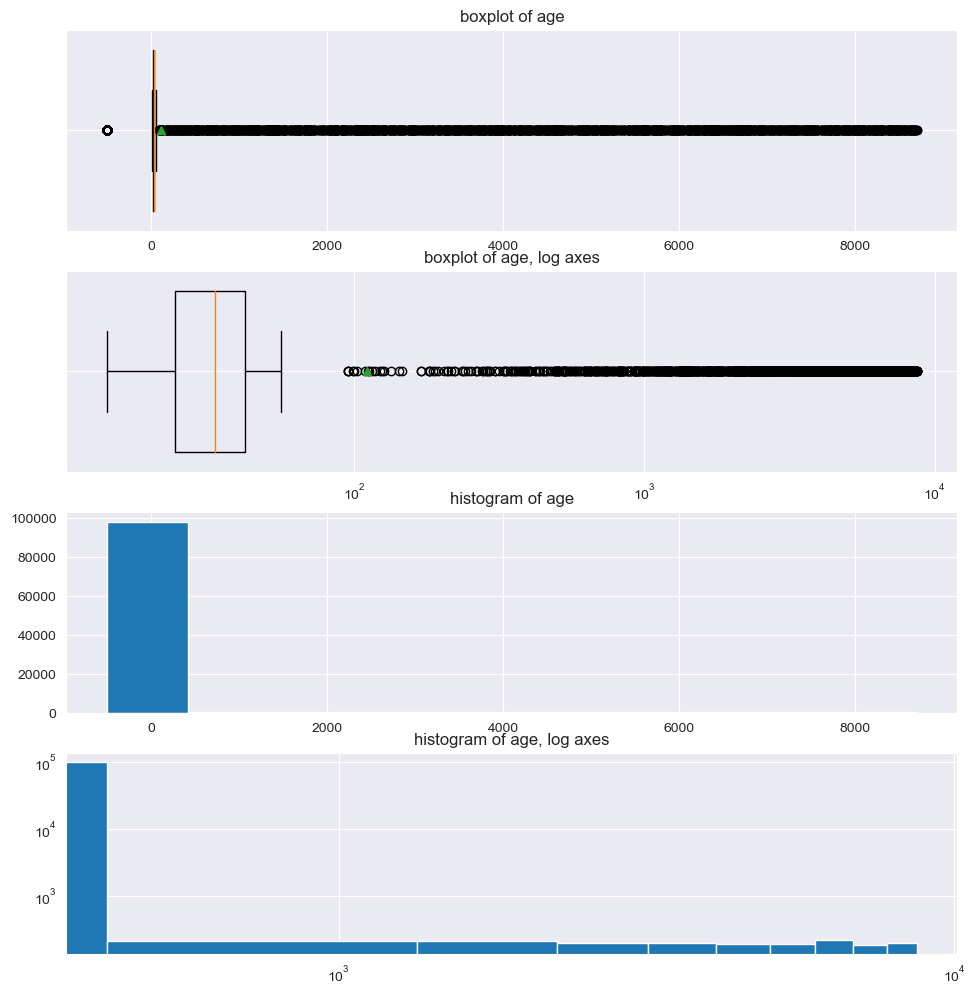

--------------------------------------------------< annual_income >--------------------------------------------------


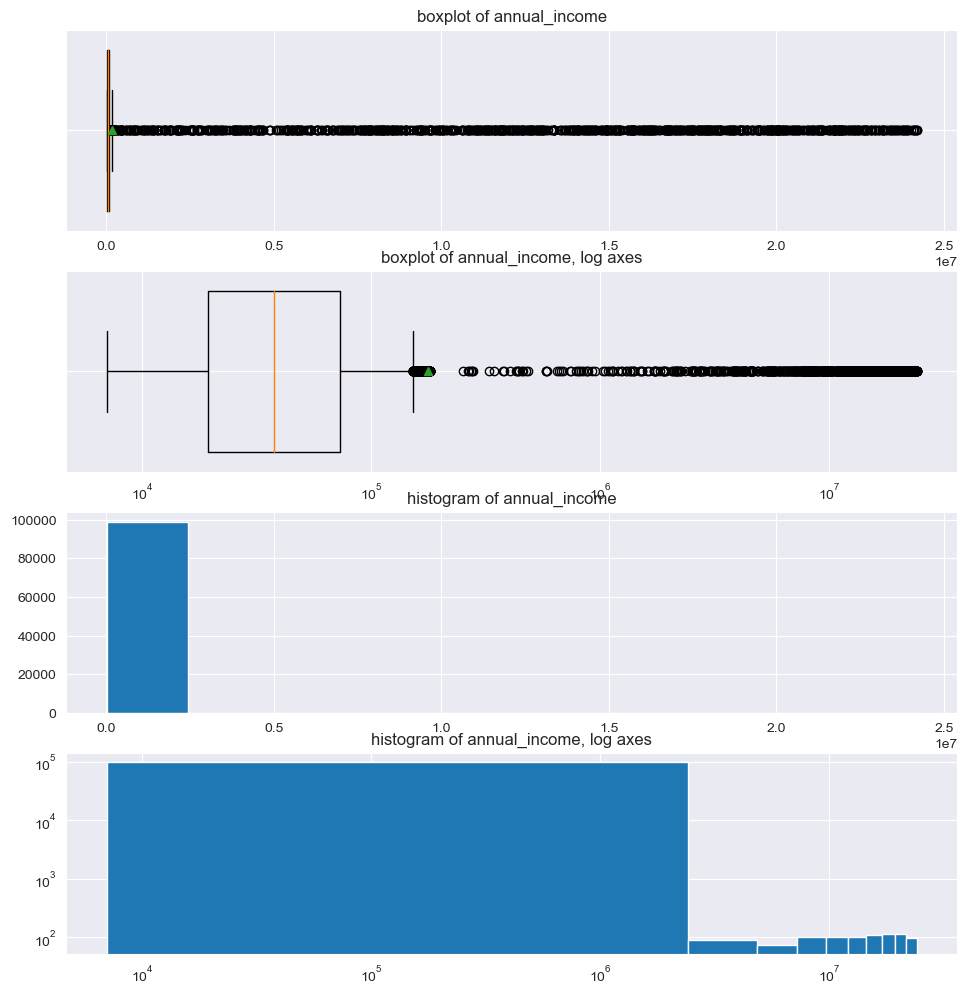

----------------------------------------------< monthly_inhand_salary >----------------------------------------------


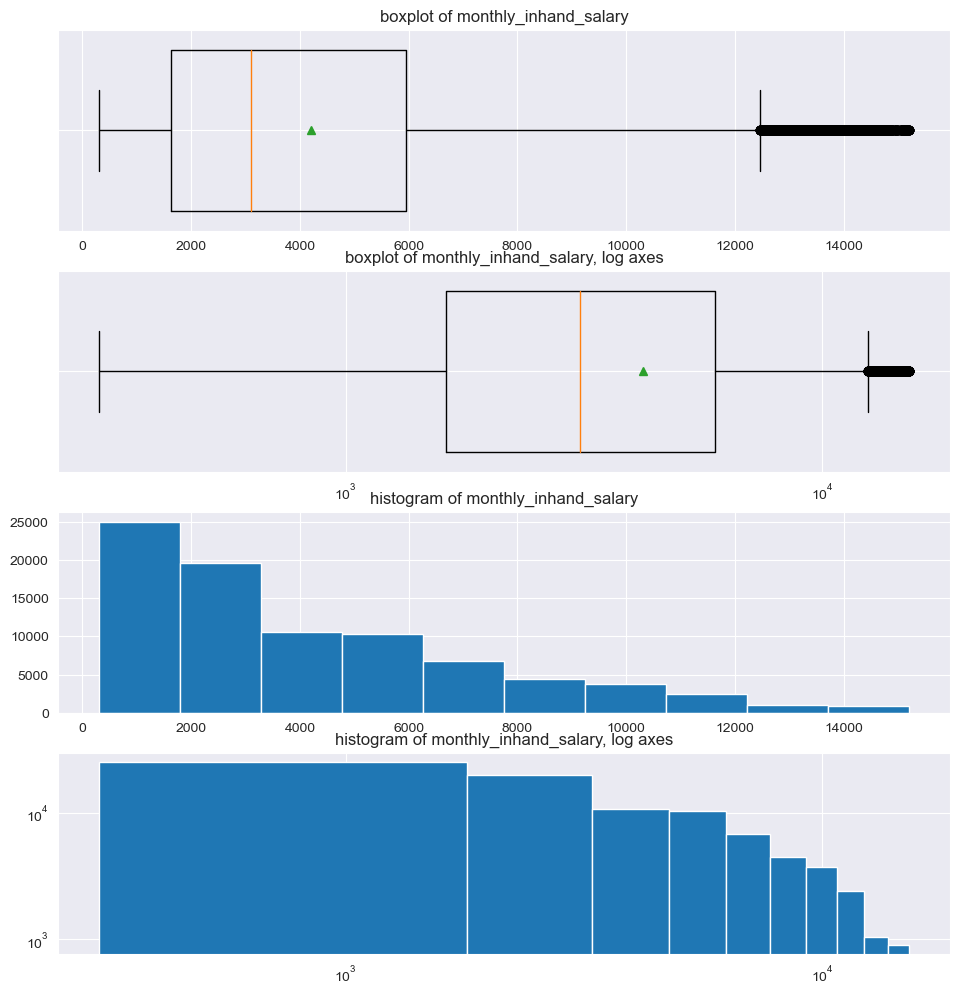

------------------------------------------------< num_bank_accounts >------------------------------------------------


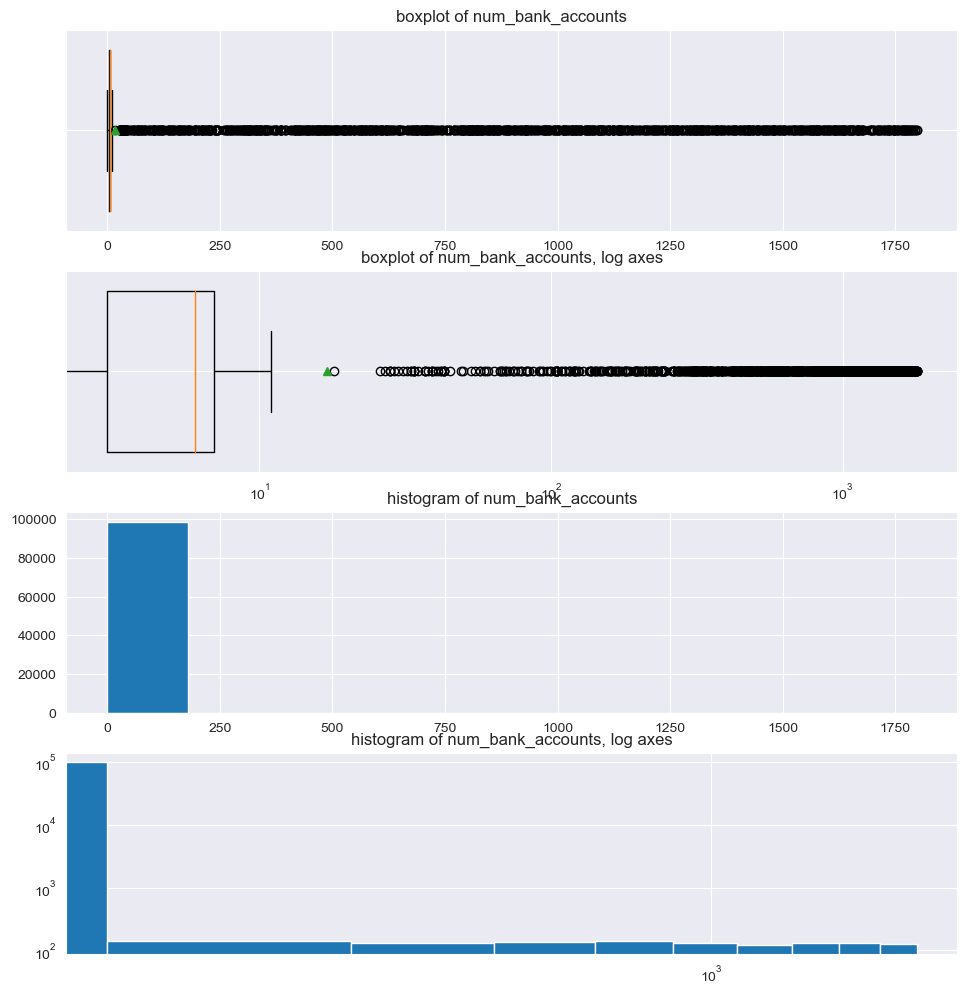

-------------------------------------------------< num_credit_card >-------------------------------------------------


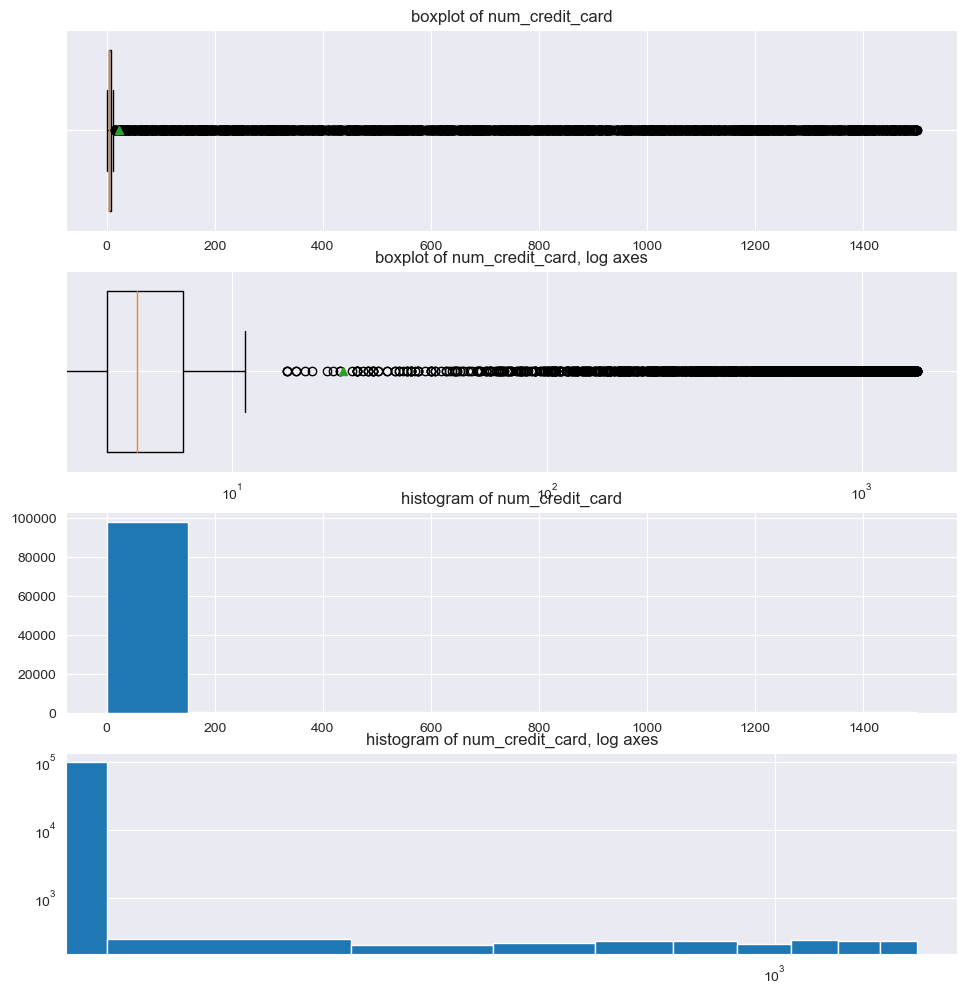

--------------------------------------------------< interest_rate >--------------------------------------------------


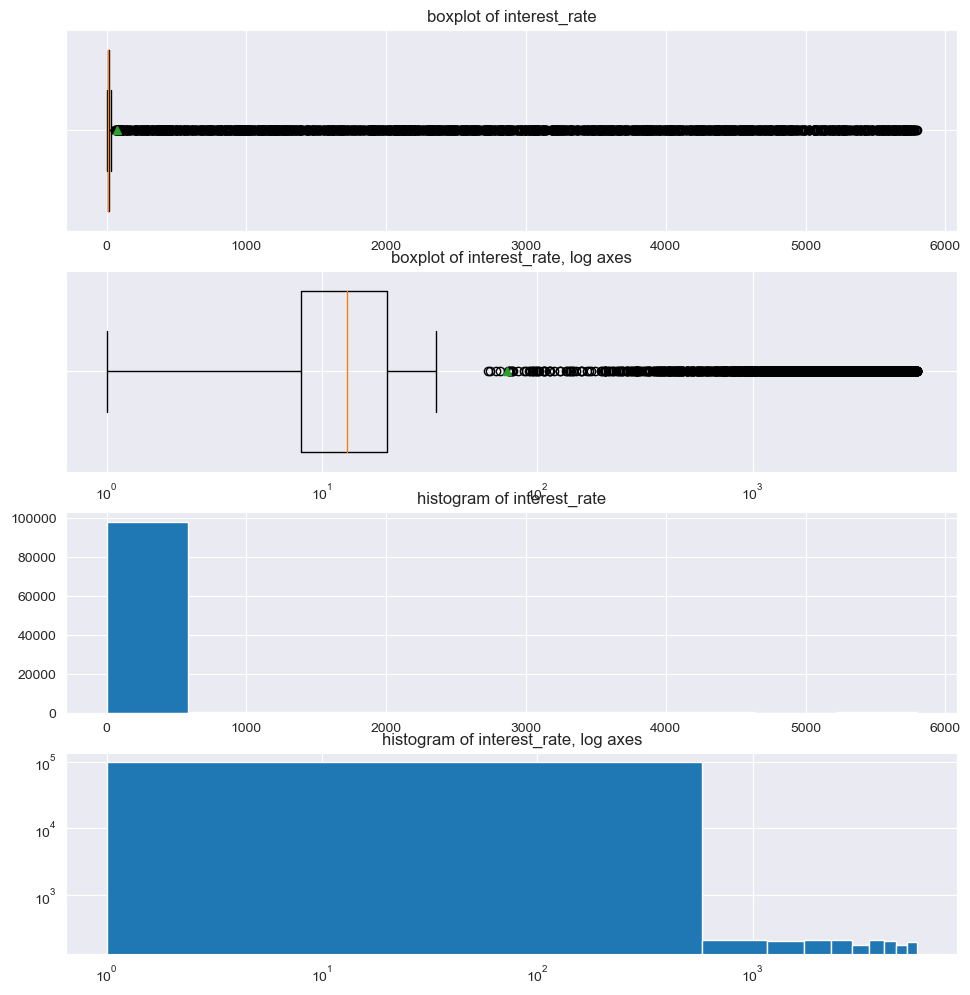

---------------------------------------------------< num_of_loan >---------------------------------------------------


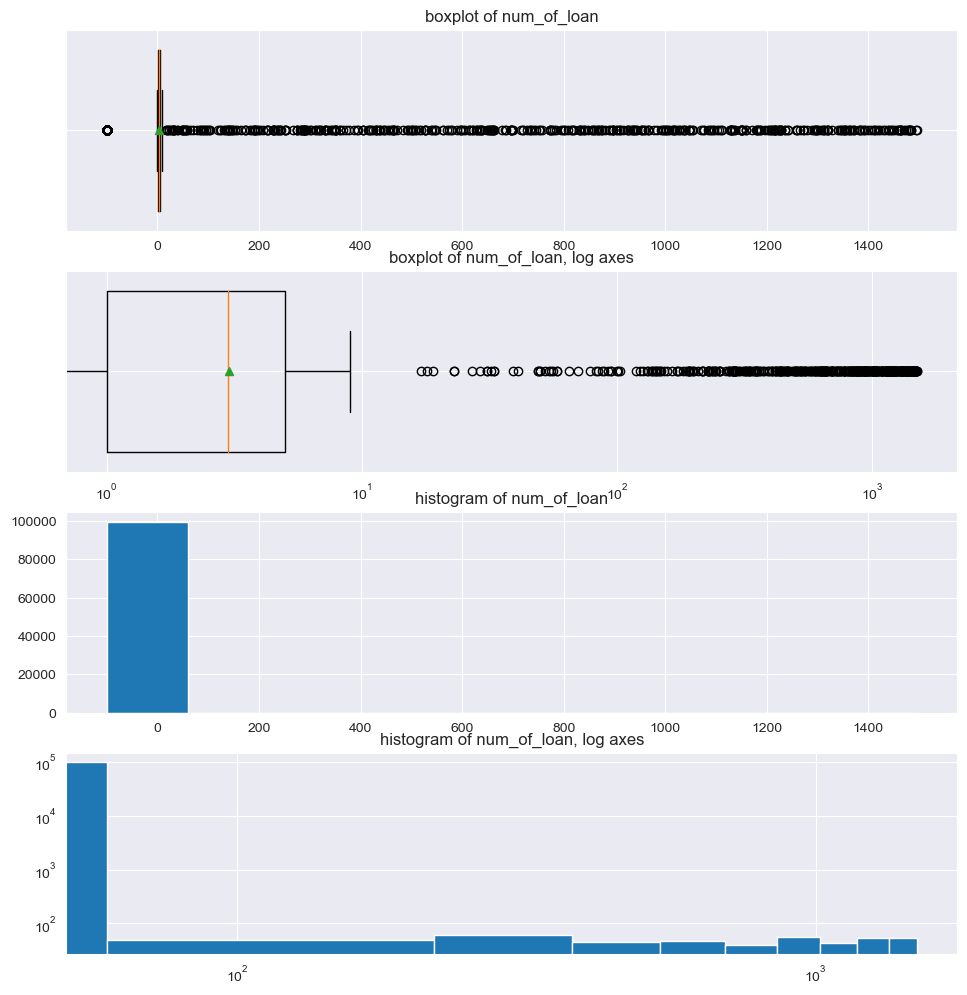

-----------------------------------------------< delay_from_due_date >-----------------------------------------------


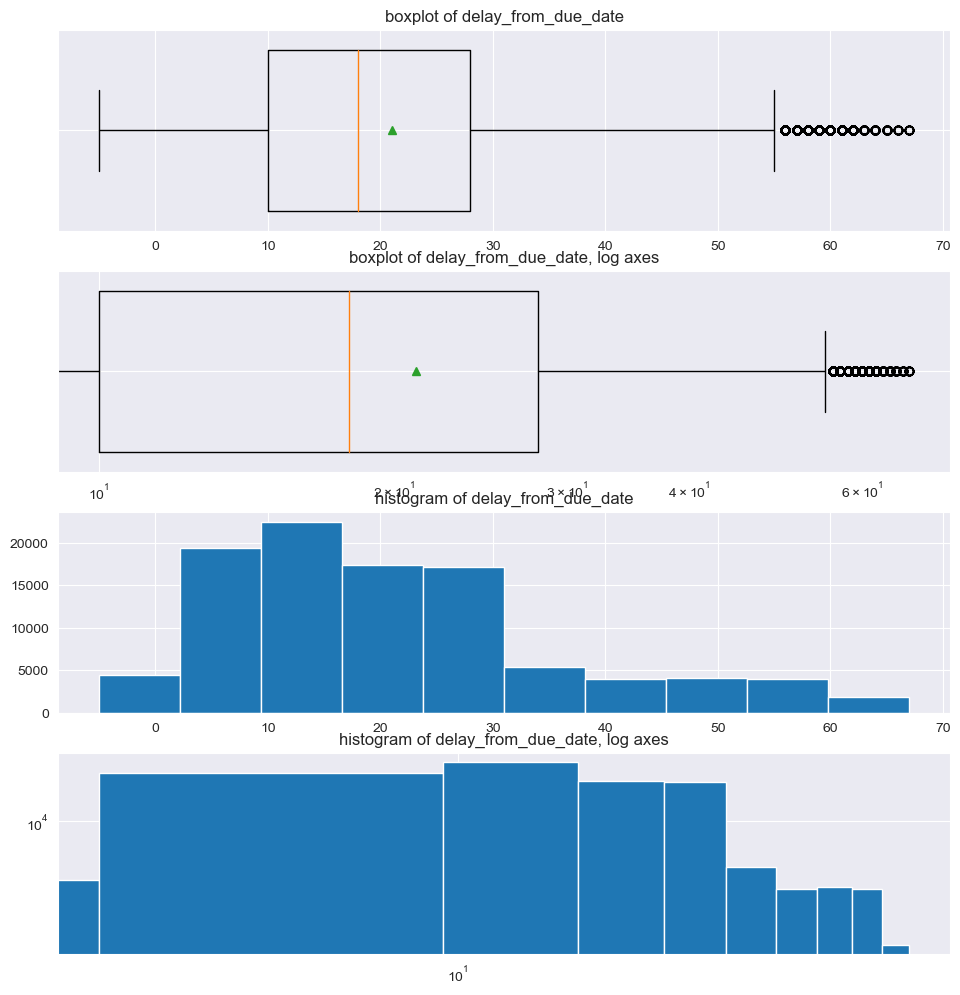

----------------------------------------------< num_of_delayed_payment >---------------------------------------------


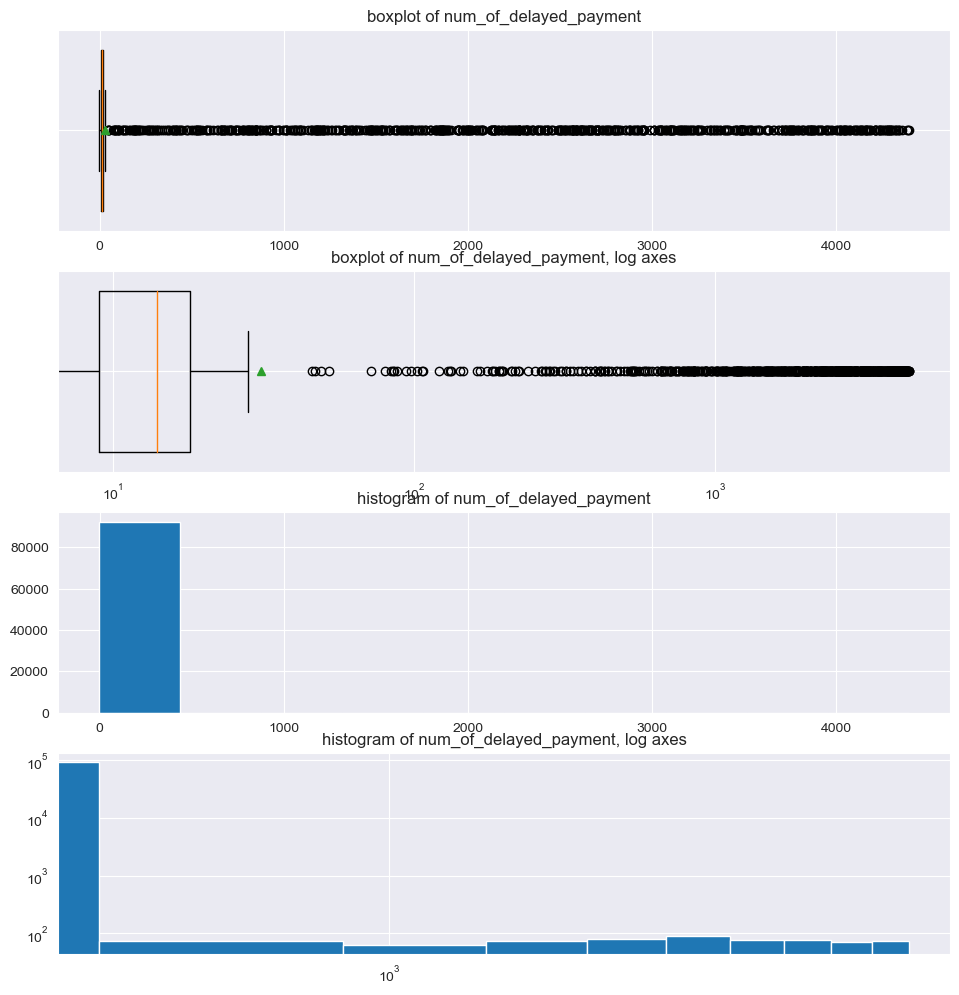

-----------------------------------------------< changed_credit_limit >----------------------------------------------


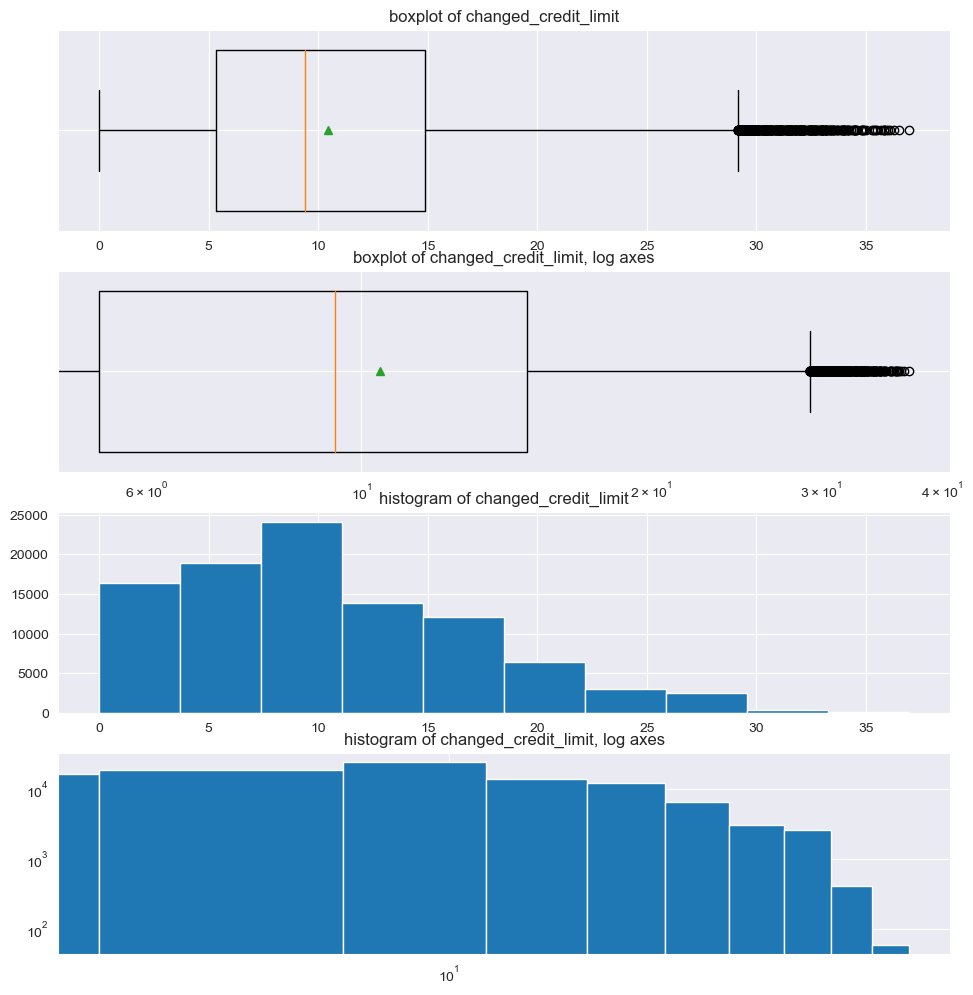

-----------------------------------------------< num_credit_inquiries >----------------------------------------------


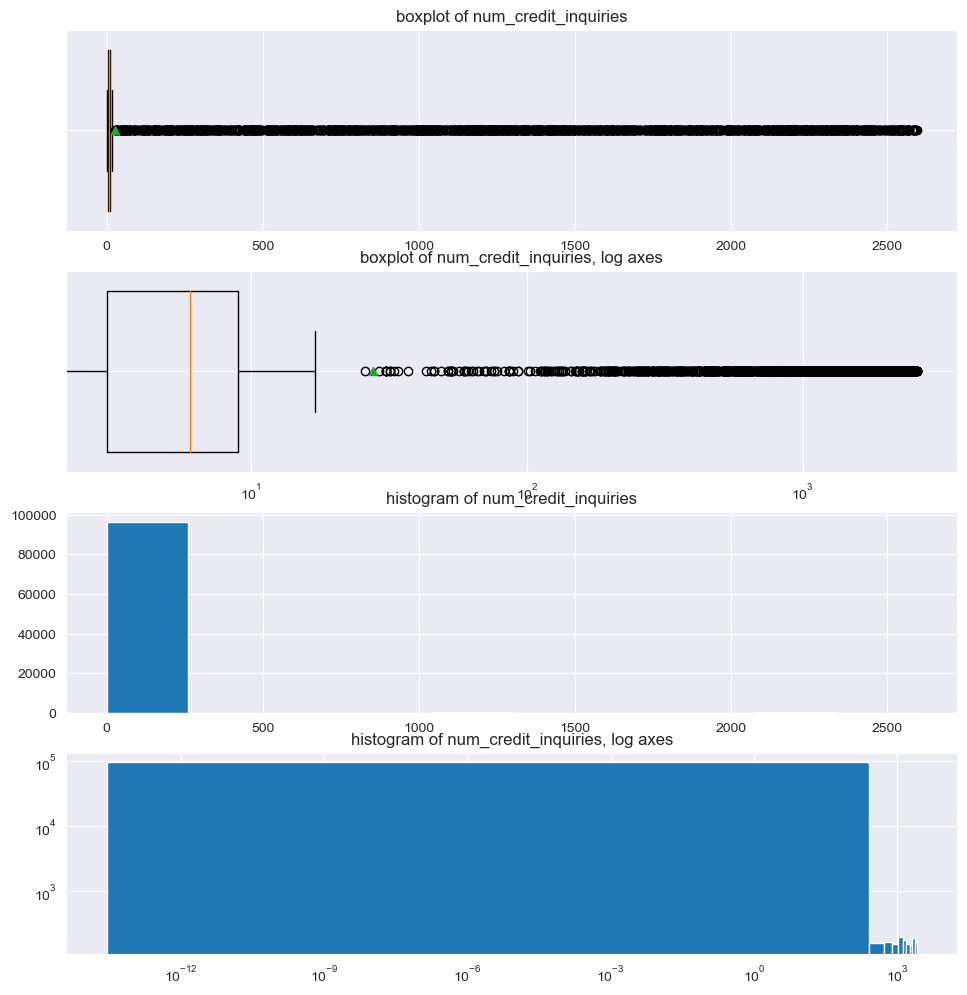

-------------------------------------------------< outstanding_debt >------------------------------------------------


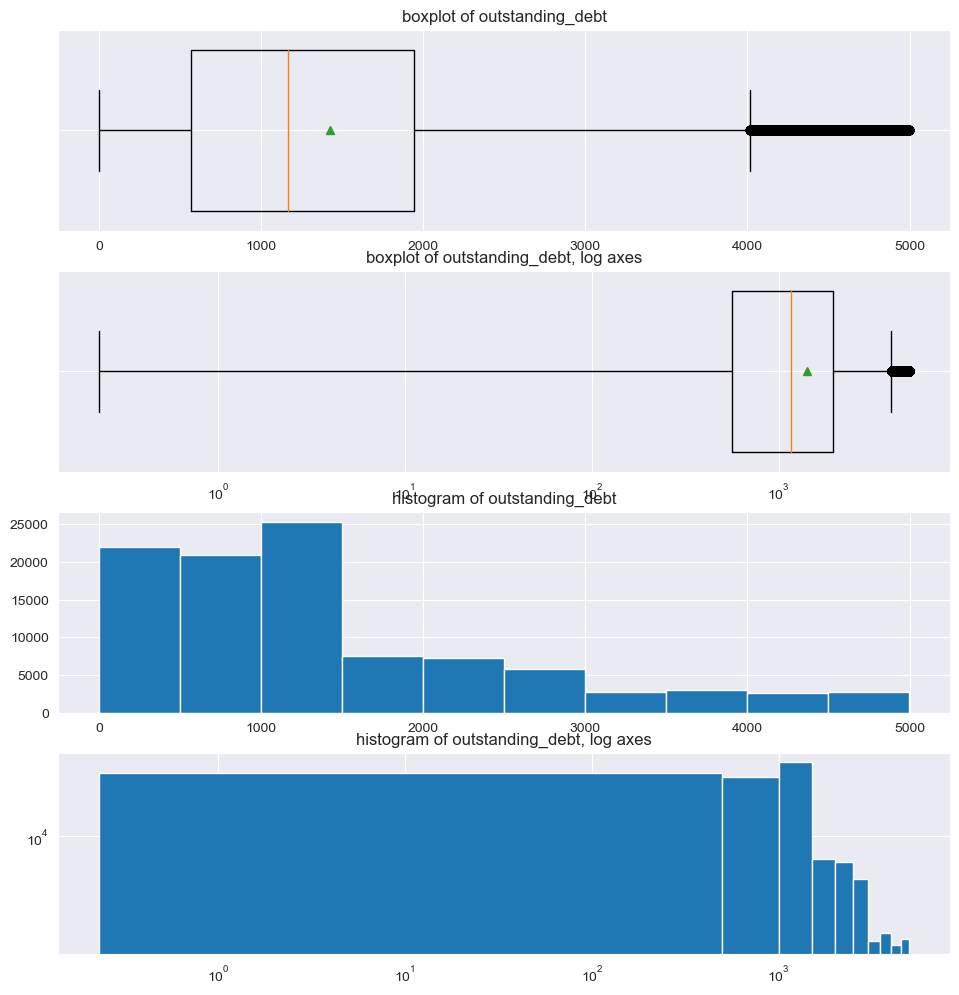

---------------------------------------------< credit_utilization_ratio >--------------------------------------------


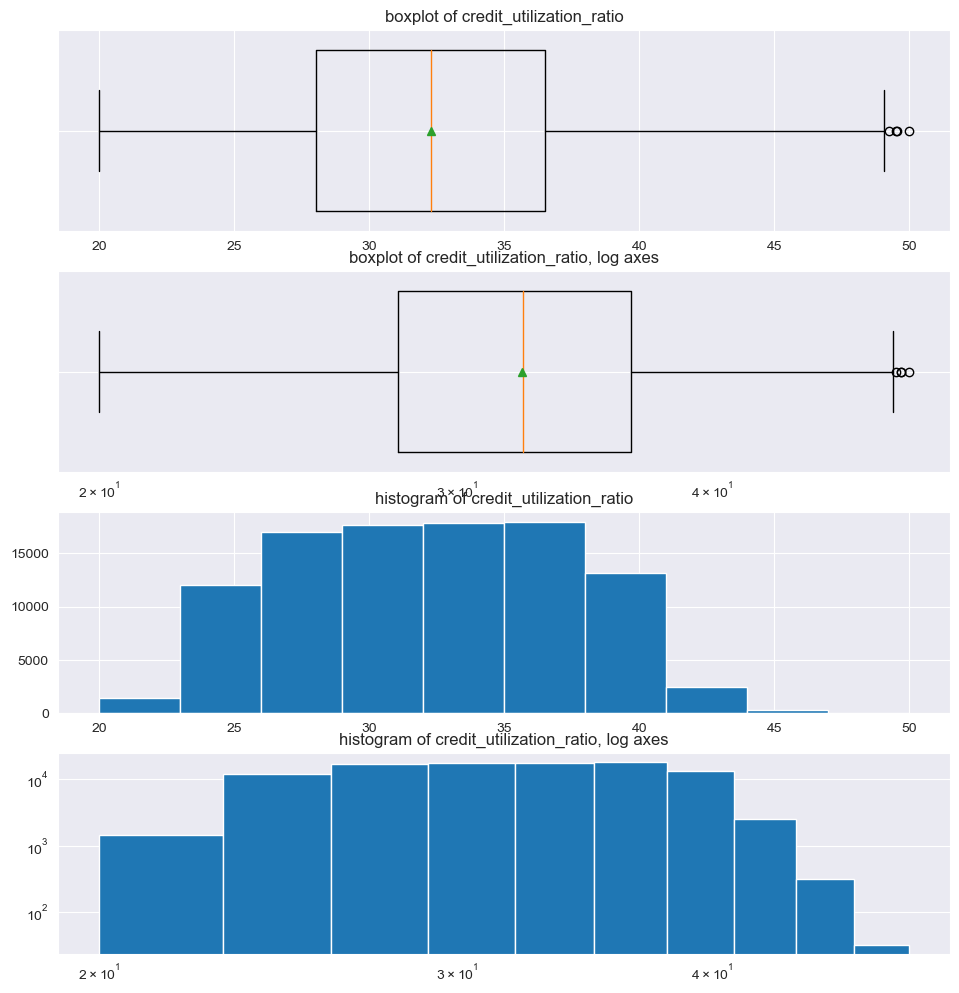

------------------------------------------------< credit_history_age >-----------------------------------------------


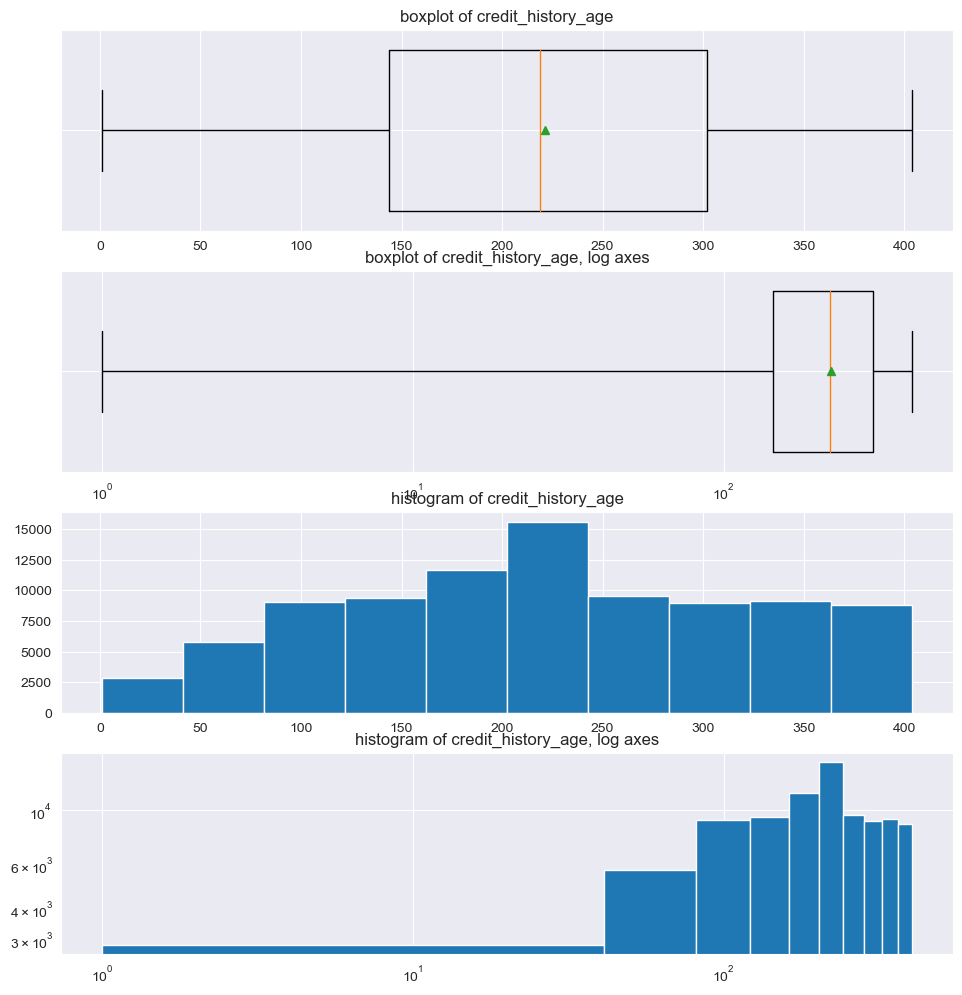

-----------------------------------------------< total_emi_per_month >-----------------------------------------------


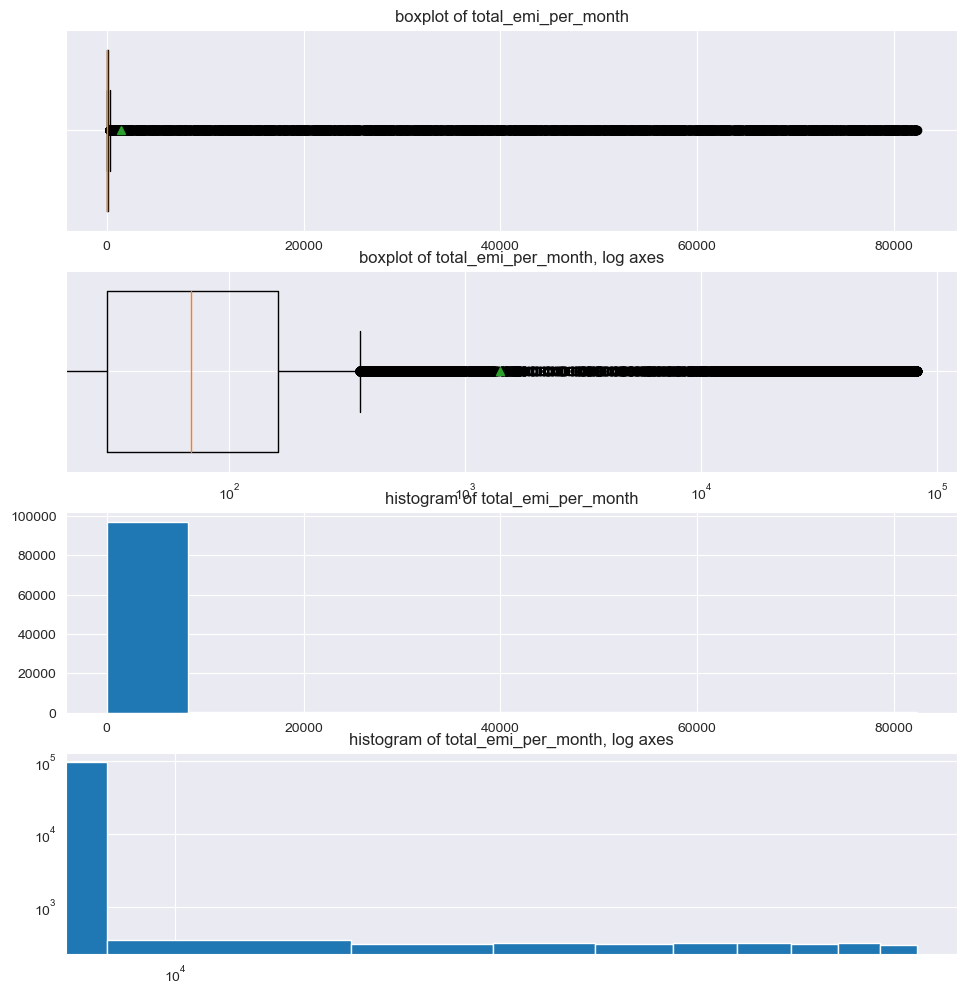

---------------------------------------------< amount_invested_monthly >---------------------------------------------


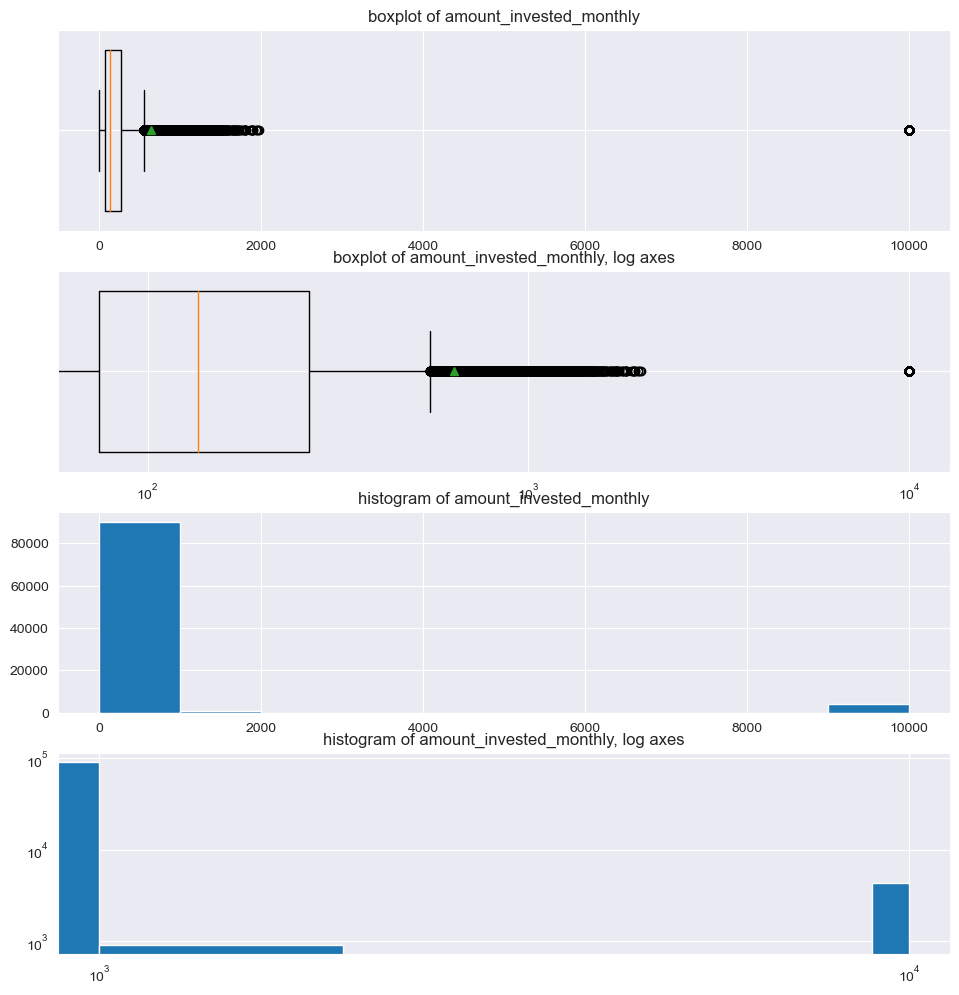

-------------------------------------------------< monthly_balance >-------------------------------------------------


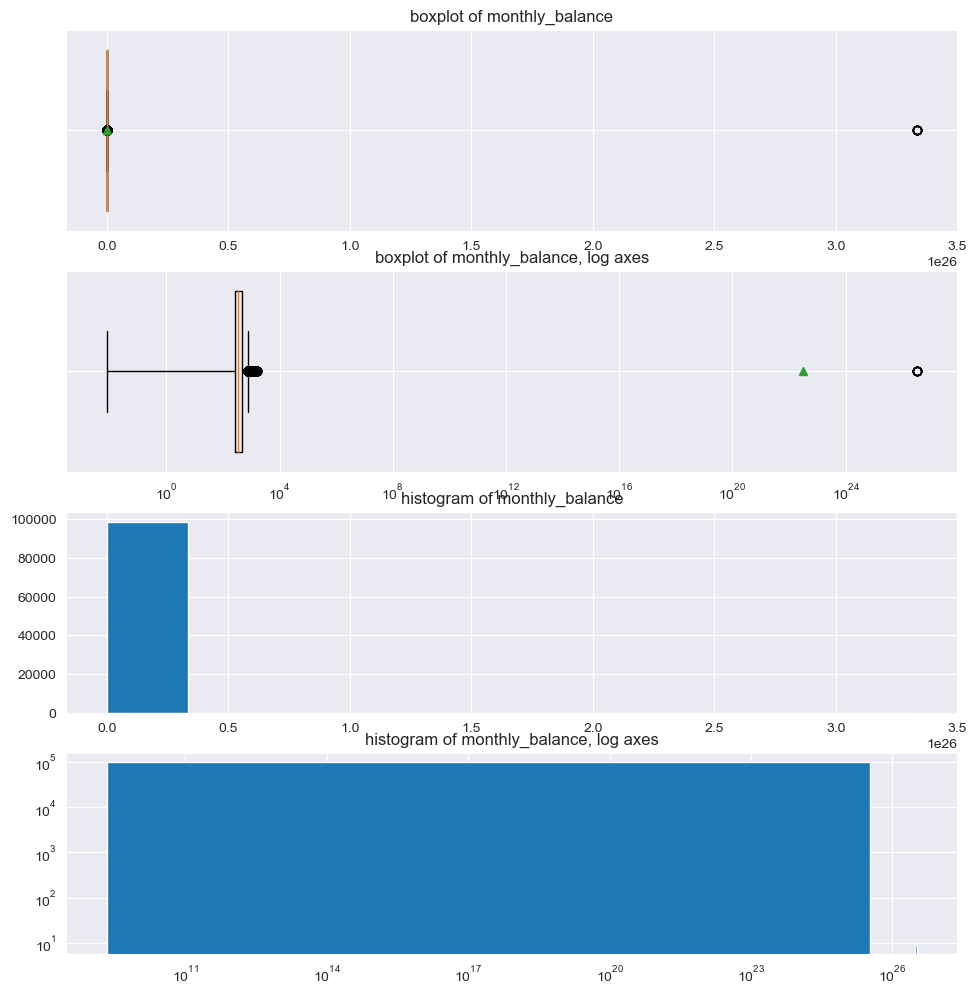

In [33]:
describe_numeric(X=X_dt.select_dtypes(np.number))

In [34]:
(X_dt["annual_income"] / X_dt["monthly_inhand_salary"]).describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

count    84998.000000
mean        67.244578
std        846.095019
min          8.089821
1%           9.213166
5%          10.350410
25%         11.553886
50%         12.025936
75%         12.553691
95%         14.586679
99%         49.095792
max      54110.522117
dtype: float64

#### annual_income & monthly_inhand_salary

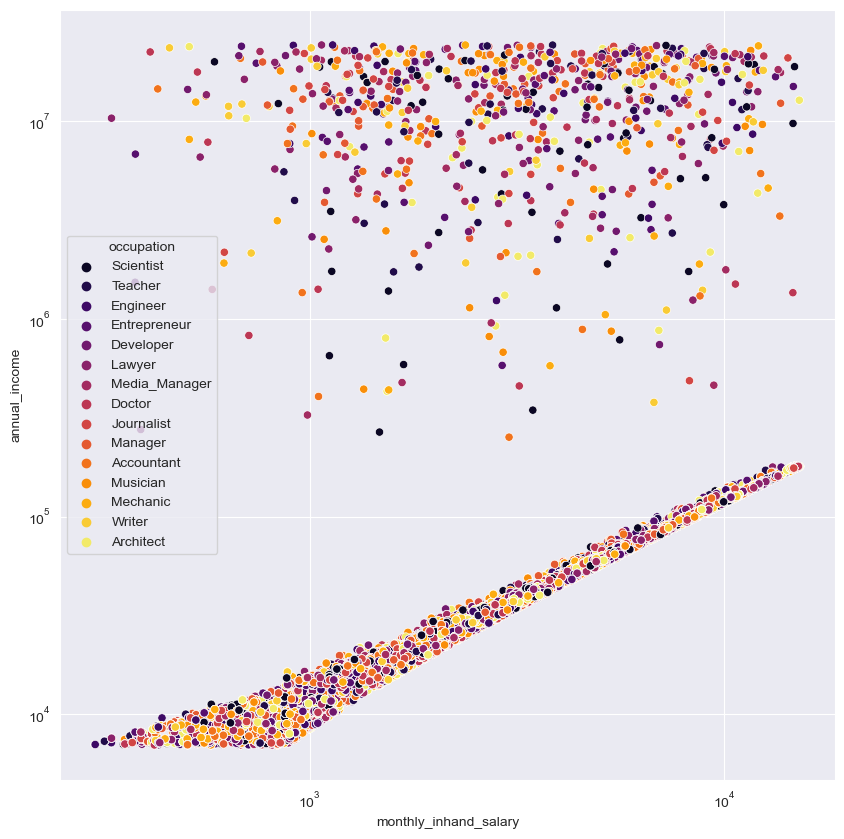

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

_ = sns.scatterplot(X_dt, x="monthly_inhand_salary", y="annual_income", hue="occupation", palette="inferno")

ax.set(xscale="log", yscale="log")

plt.show()

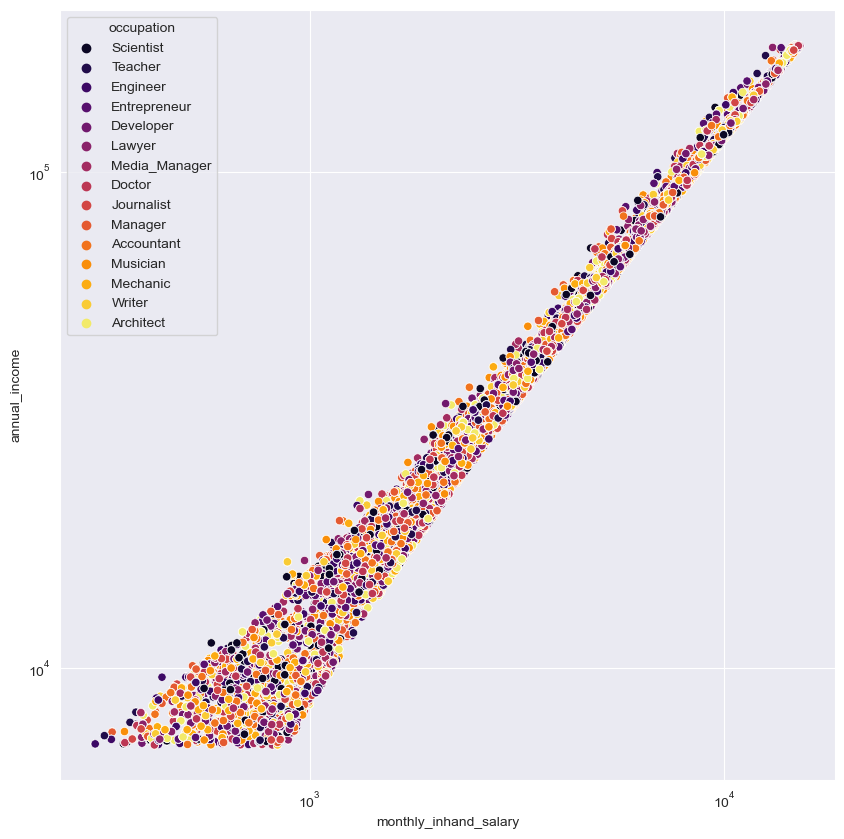

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))

_ = sns.scatterplot(temp, x="monthly_inhand_salary", y="annual_income", hue="occupation", palette="inferno")

ax.set(xscale="log", yscale="log")

plt.show()

#### age & interest_rate

In [37]:
X_dt.loc[X_dt["age"] < 120, "age"].value_counts().sort_index(ascending=False)

 118.0       1
 115.0       1
 112.0       1
 111.0       1
 109.0       1
 102.0       1
 100.0       1
 99.0        1
 95.0        3
 56.0      362
 55.0     1366
 54.0     1311
 53.0     1354
 52.0     1356
 51.0     1291
 50.0     1273
 49.0     1375
 48.0     1385
 47.0     1227
 46.0     1621
 45.0     2642
 44.0     2824
 43.0     2734
 42.0     2577
 41.0     2785
 40.0     2609
 39.0     2846
 38.0     2994
 37.0     2742
 36.0     2868
 35.0     2866
 34.0     2837
 33.0     2543
 32.0     2884
 31.0     2955
 30.0     2727
 29.0     2735
 28.0     2968
 27.0     2859
 26.0     2945
 25.0     2861
 24.0     2714
 23.0     2654
 22.0     2785
 21.0     2716
 20.0     2744
 19.0     2793
 18.0     2385
 17.0     1502
 16.0     1455
 15.0     1574
 14.0     1175
-500.0     886
Name: age, dtype: int64

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin


class ClipTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, min_value: float, max_value: float, fill_with_NA: bool = True):
        self.min_value = min_value
        self.max_value = max_value
        self.fill_with_NA  = fill_with_NA
        self.feature_names_in_: List[str]

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None, **params):
        self.feature_names_in_ = X.columns
        return self

    def get_feature_names_out(self, *args, **kwargs):
        return self.feature_names_in_

    def transform(self, X: pd.DataFrame, **legacy_param) -> pd.DataFrame:
        if not self.fill_with_NA:
            return X.clip(lower=self.min_value, upper=self.max_value).copy()
        else:
            return pd.DataFrame(
                data=np.where(
                                np.logical_or(X < self.min_value, X > self.max_value),
                                np.nan,
                                X
                            ),
                index=X.index,
                columns=X.columns,
            )
                

In [40]:
clip_transformer = ClipTransformer(min_value=0, max_value=100)
clip_transformer

ClipTransformer(max_value=100, min_value=0)

In [41]:
clip_transformer.transform(X[["num_credit_card", "num_bank_accounts"]])

,num_credit_card,num_bank_accounts
0,4.0,3.0
1,4.0,3.0
2,4.0,3.0
3,4.0,3.0
4,4.0,3.0
...,...,...
99995,6.0,4.0
99996,6.0,4.0
99997,6.0,4.0
99998,6.0,4.0


#### num_bank_accounts & num_credit_card 

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbd = KBinsDiscretizer(n_bins=7, encode="ordinal", strategy="quantile", subsample=10_000)
kbd.set_output(transform="pandas")

In [ ]:
kbd.fit(X_dt[["num_bank_accounts", "num_credit_card"]])

In [ ]:
pd.DataFrame.sparse.from_spmatrix(
    kbd.transform(X_dt[["num_bank_accounts", "num_credit_card"]]),
    index=X_dt.index,
    columns=kbd.get_feature_names_out())

In [ ]:
describe_numeric(X_dt, features="num_bank_accounts")

---

# Imputations

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer(strategy="mean", add_indicator=True)
si.set_output(transform="pandas")

In [ ]:
si.statistics_

In [ ]:
si.fit_transform(X_dt[["credit_history_age", "monthly_inhand_salary"]])

#### Interploation

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class InterpolationImputer(BaseEstimator, TransformerMixin):

    def __init__(self, method: 'str' = 'linear'):
        self.method = method
        self.feature_names_in_: List[str]

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None, **params):
        self.feature_names_in_ = X.columns
        return self

    def get_feature_names_out(self, *args, **kwargs):
        return self.feature_names_in_

    def transform(self, X: pd.DataFrame, **params) -> pd.DataFrame:
        X = X.copy()
        X = pd.concat(
                        [
                            feature_values.interpolate(method=self.method, limit_direction="both")
                            for feature_name, feature_values
                            in  X.items()
                        ],
                        axis=1
                    )
        return X


In [ ]:
ii = InterpolationImputer()
ii

In [ ]:
pd.Series().interpolate()

In [ ]:
ii.transform(X_dt[["credit_history_age", "monthly_inhand_salary"]])

# ColumnTransformer

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
X.columns

In [ ]:
from sklearn.impute import MissingIndicator

In [ ]:
outlier_transformer = ColumnTransformer(
    transformers=[
                    (
                        "age_clip",
                        ClipTransformer(min_value=14, max_value=99),
                        ["age"]
                    ),
                    (
                        "n_accounts_and_credit_cards",
                        KBinsDiscretizer(n_bins=7, encode="ordinal"),
                        ["num_bank_accounts", "num_credit_card"]
                    ),
                ],
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")
outlier_transformer

In [ ]:
outlier_transformer.fit_transform(X_dt)

In [ ]:
imputer_transformer = ColumnTransformer(
    transformers=[
                    (
                        "accounts_and_credit_cards",
                        SimpleImputer(strategy="constant", fill_value=-10),
                        ['num_bank_accounts', 'num_credit_card']
                    ),
                    (
                        "monthly_inhand_salary",
                        InterpolationImputer(),
                        ["age", "monthly_inhand_salary"]
                    ),
                    (
                        "missing_value_indicator",
                        MissingIndicator(),
                        ['num_bank_accounts', 'num_credit_card', "monthly_inhand_salary"]
                    ),
                ],
    remainder="drop",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

In [ ]:
imputer_transformer.fit(X_dt)

# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(
                steps=[
                        ("outlier_handler", outlier_transformer),
                        ("missing_handler", imputer_transformer)
                    ],
                verbose=True
            )

In [ ]:
pipe.set_output(transform="pandas")

In [ ]:
pipe.fit_transform(X_dt)